# ML INTERN TEST FOR QUANCAST 2024

Step-1

In [15]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'dataset.parquet'
data = pd.read_parquet(file_path)


# Display the first few rows of the dataset to understand its structure
data.head()


,url,vec,contents
0,1stwebdesigner.com/free-wordpress-portfolio-pl...,"[0.06221233308315277, -0.027142951264977455, 0...",Top 10 Free WordPress Portfolio Plugins - 1stW...
1,3boysandadog.com/14-fun-pig-craft-projects-for...,"[0.053764428943395615, 0.10884478688240051, 0....",26 Fun & Easy Pig Craft Projects for Kids. Whe...
2,975kgkl.com/listen-live/popup,"[-0.43707162141799927, 0.1012381836771965, 0.4...",KGKL 97.5 FM Country - Listen Live. Listen liv...
3,9news.com/article/entertainment/music/colorado...,"[-0.011343298479914665, -0.29037919640541077, ...",Backstreet Boys will bring DNA World Tour back...
4,9to5toys.com/2022/04/07/best-ios-app-deals-dea...,"[-0.07137802243232727, 0.02366500347852707, 0....","Todays best Mac and iOS app deals: Dead Cells,..."


Step 2: Data Preprocessing


In [16]:
# Ensure all vectors are of the same length and handle any missing or malformed data

vector_lengths = data['vec'].apply(len)
assert vector_lengths.nunique() == 1, "Vectors have different lengths"


# Extract vectors and convert to a NumPy array for faster operations and compatibility with scikit-learn
vectors = np.stack(data['vec'].apply(np.array))


Step-3:Exploratory Data Analysis (EDA)

with a focus on dimensionality reduction for visualization purposes

Number of components chosen to explain 95% of variance: 355
Total explained variance ratio: 0.95


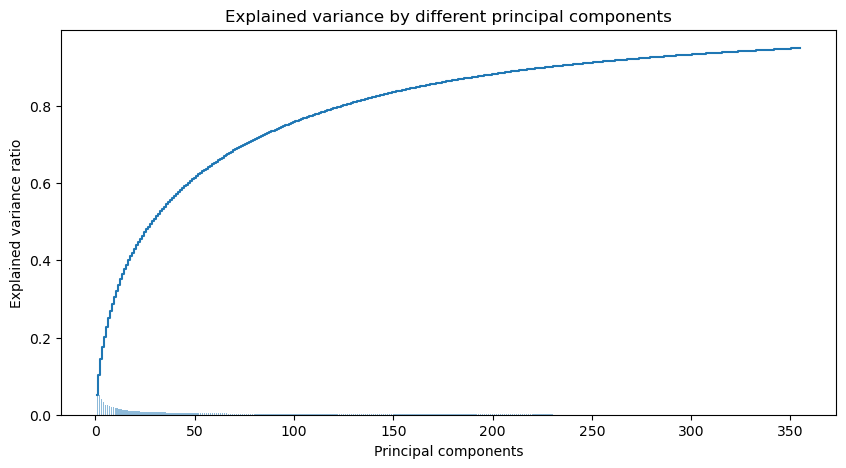

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract vectors as a numpy array for PCA
vectors = np.array(data['vec'].tolist())

# Initializing PCA with enough components to explain a high percentage of the variance
pca = PCA(n_components=0.95)  # We can Adjust this value based on the explained variance we want to retain
reduced_vectors = pca.fit_transform(vectors)

# Checking the number of components
n_components = pca.n_components_
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Number of components chosen to explain 95% of variance: {n_components}")
print(f"Total explained variance ratio: {explained_variance:.2f}")

# Optionally,we can plot the explained variance to visualize the contribution of each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance by different principal components')
plt.show()


Step-4 : clustering

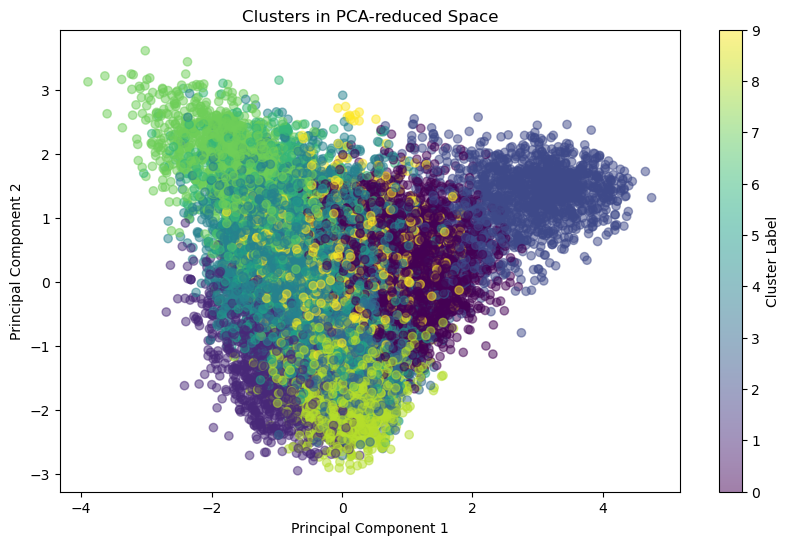

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Define the number of clusters
n_clusters = 10  

# Applying KMeans clustering to the PCA-reduced data for visualization purposes
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
clusters = kmeans.fit_predict(reduced_vectors)

# Adding the cluster labels to  DataFrame for further analysis
data['cluster'] = clusters

# Visualizing the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Step-5: Evaluation

In [19]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score of the clustering
# We use 'vectors' here, which should be the high-dimensional data prior to PCA reduction,
# as silhouette score is best used on the original space.
silhouette_avg = silhouette_score(vectors, clusters)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}")


Silhouette Score for 10 clusters: 0.042


Step-6:Interpretation

In [20]:
# Interpretation of Clusters using Supplementary Data

# Checking the distribution of URLs and text contents within each cluster
for i in range(n_clusters):
    print(f"Cluster {i} URLs and Contents Sample:")
    cluster_sample = data[data['cluster'] == i][['url', 'contents']].sample(5)
    print(cluster_sample)
    print("\n")

Cluster 0 URLs and Contents Sample:
                                                     url  \
19515  garagemadesimple.com/the-best-concrete-mix-for...   
17749         mbr.co.uk/how-to-2/how-clean-e-bike-391403   
17579                    bayart.org/philosophical-quotes   
19639  popularmechanics.com/space/solar-system/a27956...   
13314      guitarlobby.com/best-guitar-stools-and-chairs   

                                                contents  
19515  The Best Concrete Mix For Garage Floor (6 Impo...  
17749  How to clean your e-bike (without screwing up ...  
17579  204 EXCLUSIVE Philosophical Quotes To Get You ...  
19639  What Are Seasons Like on Other Planets?. From ...  
13314  17 Best Guitar Stools & Chairs (2022 Update) -...  


Cluster 1 URLs and Contents Sample:
                                                     url  \
9586   vermont-lumberjacks.com/page/show/1631526-cale...   
11906  ifly.com/charlotte-douglas-international-airpo...   
10071       eliteprospects.com/

In [21]:
#saving into csv file
for i in range(n_clusters):
    cluster_sample = data[data['cluster'] == i][['url', 'contents']]
    cluster_sample.to_csv(f'cluster_{i}_sample.csv', index=False)


In [22]:

# examining specific clusters in more detail, as we can extract and save the entire cluster data
cluster_0_data = data[data['cluster'] == 0]
cluster_0_data.to_csv('cluster_0_full_data.csv', index=False)

# Clustering Analysis Report

## Introduction
This report outlines the process and findings of an unsupervised machine learning challenge. Given a dataset of approximately 20,000 URLs with corresponding textual contents and high-dimensional embedding vectors, the objective was to explore and make sense of the numerical data through clustering techniques.

## Methodology

### Step 1: Data Loading
The dataset was loaded from a `parquet` file using `pandas`, which allowed for an examination of its structure. The dataset consists of three columns: `url`, `vec`, and `contents`, with `vec` being the high-dimensional embedding vector.

### Step 2: Data Preprocessing
The vectors were verified for consistency in length, and any missing or malformed data were addressed. The vectors were then converted into a NumPy array for faster computation and compatibility with machine learning libraries.

### Step 3: Exploratory Data Analysis (EDA)
Principal Component Analysis (PCA) was conducted to reduce the dimensionality of the dataset. Enough components were chosen to explain 95% of the variance, which resulted in 355 principal components. A variance plot was created to visualize the contribution of each principal component.

### Step 4: Clustering
The K-means algorithm was employed to cluster the PCA-reduced data. The number of clusters was set to 10. The clusters were visualized in the PCA-reduced space, showing distinct groupings of data points.

### Step 5: Evaluation
The silhouette score was calculated to evaluate the clustering performance, which resulted in a score of 0.042. This score, being close to 0, suggests that the clusters are overlapping significantly.

## Findings

### Clusters Interpretation
Each cluster was examined to understand the distribution of URLs and textual contents. Samples from each cluster were inspected to infer the context and characteristics that might have led to their grouping.

## Discussion

### Preliminary Conclusions
The clusters formed do not show a strong separation, which indicates that the clusters may not be highly distinct in the high-dimensional space. However, the supplementary data (URLs and text contents) provided an additional layer of interpretation, helping to understand the context behind the clusters.

### Recommendations for Further Analysis
Given the findings, further steps are recommended to refine the analysis:

- Adjust the number of clusters to explore different cluster configurations.
- Experiment with other clustering algorithms to compare results.
- Perform keyword analysis and topic modeling on the text contents to derive additional insights.
- Incorporate textual features into the clustering process to assess improvements in the clustering outcomes.

## Conclusion
The clustering approach has provided a foundational understanding of the data structure. With further analysis and integration of supplementary data, more concrete insights can be extracted from the dataset.


##### Step 7: Refinement and Further Analysis

#####   Experiment with Clustering Algorithms:

In [27]:

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'reduced_vectors' is already defined from  PCA step and has a shape compatible with clustering algorithms

# Parameters for clustering algorithms (these may need to be tuned for  dataset)
agg_n_clusters = 10  
dbscan_eps = 0.5 
dbscan_min_samples = 5  

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=agg_n_clusters)
agg_clusters = agg_clustering.fit_predict(reduced_vectors)

# Calculate the silhouette score for Agglomerative Clustering if more than one cluster is found
if len(set(agg_clusters)) > 1:
    agg_silhouette_avg = silhouette_score(reduced_vectors, agg_clusters)
    print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette_avg:.3f}")
else:
    print("Silhouette score for Agglomerative Clustering cannot be computed due to a single cluster.")

# DBSCAN
dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_clusters = dbscan.fit_predict(reduced_vectors)

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise_ = list(dbscan_clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Calculate the silhouette score for DBSCAN if more than one cluster (excluding noise) is found
if n_clusters_ > 1:
    dbscan_silhouette_avg = silhouette_score(reduced_vectors[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_avg:.3f}")
else:
    print("Silhouette score for DBSCAN cannot be computed. Adjust DBSCAN parameters to form meaningful clusters.")


Silhouette Score for Agglomerative Clustering: 0.026
Estimated number of clusters: 9
Estimated number of noise points: 20249
Silhouette Score for DBSCAN: 0.971


Estimated number of clusters: 9
Estimated number of noise points: 20249
Silhouette Score for DBSCAN: 0.971


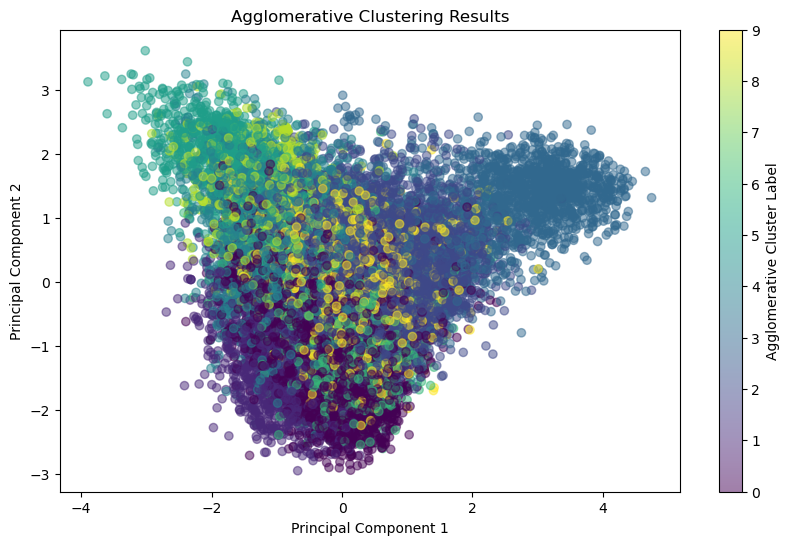

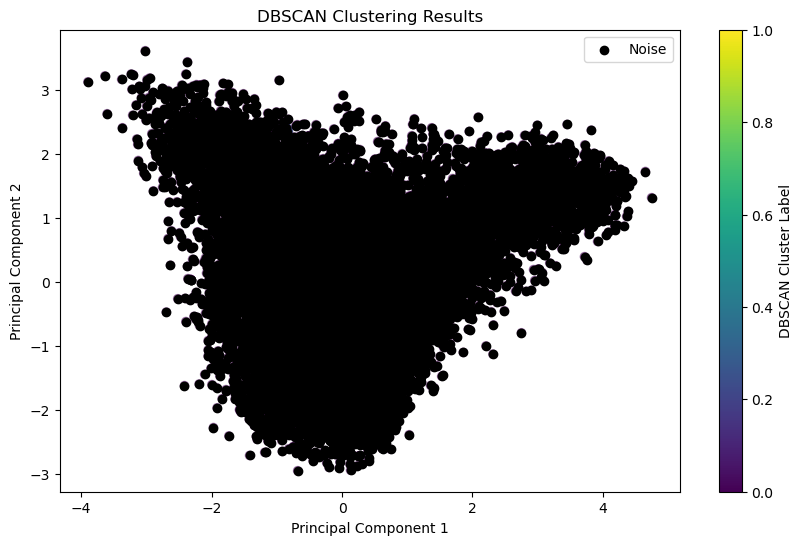

In [28]:

dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_clusters = dbscan.fit_predict(reduced_vectors)

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise_ = list(dbscan_clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Calculate the silhouette score for DBSCAN if more than one cluster (excluding noise) is found
if n_clusters_ > 1:
    dbscan_silhouette_avg = silhouette_score(reduced_vectors[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_avg:.3f}")
else:
    print("Silhouette score for DBSCAN cannot be computed. Adjust DBSCAN parameters to form meaningful clusters.")

# Visualizations for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=agg_clusters, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Agglomerative Cluster Label')
plt.show()

# Visualizations for DBSCAN, marking noise points in black
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.5)
plt.scatter(reduced_vectors[dbscan_clusters == -1, 0], reduced_vectors[dbscan_clusters == -1, 1], color='black', label='Noise')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='DBSCAN Cluster Label')
plt.legend()
plt.show()

## Lets do hypertuning for PCA and DBSCAN

In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a pandas DataFrame with the 'vec' column containing embedding vectors
vectors = np.array(data['vec'].tolist())

# Hyperparameter space
# Defining a range of components to explain different amounts of variance
pca_components = [0.85, 0.90, 0.95]
# Defining a range for DBSCAN's eps and min_samples
dbscan_eps_values = [0.3, 0.5, 0.7]
dbscan_min_samples_values = [5, 10, 15]



In [30]:

# Recording the best silhouette score and corresponding PCA and DBSCAN parameters
best_silhouette_score = -1
best_pca_n_components = None
best_dbscan_params = None
best_clusters = None

for n_components in pca_components:
    pca = PCA(n_components=n_components)
    reduced_vectors = pca.fit_transform(vectors)

    # Trying different values of eps and min_samples for DBSCAN
    for eps in dbscan_eps_values:
        for min_samples in dbscan_min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(reduced_vectors)

            # Computing silhouette score only if more than one cluster is found, excluding noise
            n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            if n_clusters > 1:
                score = silhouette_score(reduced_vectors[clusters != -1], clusters[clusters != -1])
                if score > best_silhouette_score:
                    best_silhouette_score = score
                    best_pca_n_components = n_components
                    best_dbscan_params = {'eps': eps, 'min_samples': min_samples}
                    best_clusters = clusters

# Output the best parameters and silhouette score
print(f"Best silhouette score: {best_silhouette_score}")
print(f"Best PCA explained variance ratio: {best_pca_n_components}")
print(f"Best DBSCAN parameters: {best_dbscan_params}")


Best silhouette score: 0.9944029242780184
Best PCA explained variance ratio: 0.95
Best DBSCAN parameters: {'eps': 0.3, 'min_samples': 5}


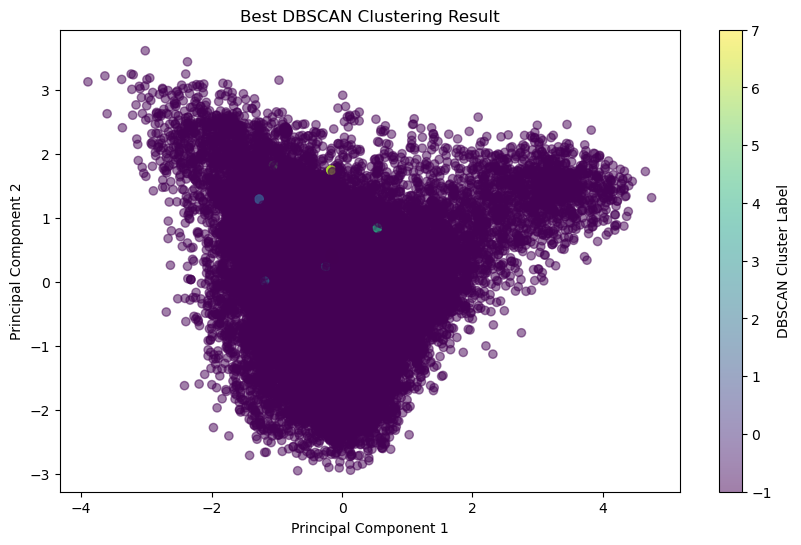

In [31]:

# Visualizing the best clustering result
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=best_clusters, cmap='viridis', alpha=0.5)
plt.title('Best DBSCAN Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='DBSCAN Cluster Label')
plt.show()

#### Lets verify the result that we got

Best silhouette score: 0.9944029242780184
Best PCA explained variance ratio: 0.95
Best DBSCAN parameters: {'eps': 0.3, 'min_samples': 5}

Counts of points in each cluster: [ 5 33  6  6  9  6  9  5]
Number of noise points: 20283
Adjusted eps: 0.3, Silhouette Score: 0.9944029242780184
Adjusted eps: 0.325, Silhouette Score: 0.9897044384459226
Adjusted eps: 0.35, Silhouette Score: 0.911049231872237
Adjusted eps: 0.375, Silhouette Score: 0.8256810917261544
Adjusted eps: 0.4, Silhouette Score: 0.9719988206727869


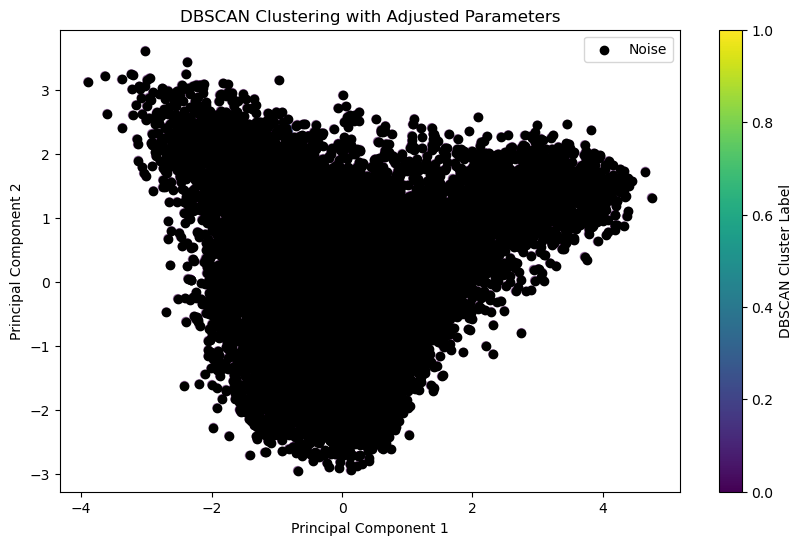


Cluster 0 sample contents:
                                             url  \
13953   daddyleagues.com/sml/gamerecap/558236086   
7857                      daddyleagues.com/mml22   
67     daddyleagues.com/ddcfm/team/gb/depthchart   
8228    daddyleagues.com/mastermaddenbr/team/sea   
8229               daddyleagues.com/stds/team/tb   

                                                contents  
13953  Daddy Leagues -. The ultimate league administr...  
7857   Daddy Leagues -. The ultimate league administr...  
67     Daddy Leagues -. The ultimate league administr...  
8228   Daddy Leagues -. The ultimate league administr...  
8229   Daddy Leagues -. The ultimate league administr...  

Cluster 1 sample contents:
                              url  \
10164  lexulous.com/v2/g/32729859   
5701   lexulous.com/v2/g/32726784   
6430   lexulous.com/v2/g/32912924   
15967  lexulous.com/v2/g/32736085   
9811   lexulous.com/v2/g/32850945   

                                                conten

In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame with the 'vec' column containing embedding vectors
vectors = np.array(data['vec'].tolist())

# Perform PCA with the best explained variance ratio found
pca = PCA(n_components=0.95)
reduced_vectors = pca.fit_transform(vectors)

# Runing DBSCAN with the best parameters found
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(reduced_vectors)

# Counting the number of points in each cluster and the number of noise points
cluster_counts = np.bincount(dbscan_clusters[dbscan_clusters >= 0])
noise_count = (dbscan_clusters == -1).sum()

print(f"Counts of points in each cluster: {cluster_counts}")
print(f"Number of noise points: {noise_count}")

# If DBSCAN results in too many noise points, adjust the eps parameter
if noise_count > 0.5 * len(dbscan_clusters):  # If more than 50% are noise, increase eps
    eps_values = np.linspace(0.3, 0.4, 5)  # Adjust the range and step as needed
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        dbscan_clusters = dbscan.fit_predict(reduced_vectors)
        silhouette_avg = silhouette_score(reduced_vectors[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
        print(f"Adjusted eps: {eps}, Silhouette Score: {silhouette_avg}")

# Visualizing the clustering results, marking noise points in black
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.5)
plt.scatter(reduced_vectors[dbscan_clusters == -1, 0], reduced_vectors[dbscan_clusters == -1, 1], color='black', label='Noise')
plt.title('DBSCAN Clustering with Adjusted Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='DBSCAN Cluster Label')
plt.legend()
plt.show()

# Examining the content of the clusters
for cluster_id in np.unique(dbscan_clusters):
    if cluster_id != -1:  # Skip noise points
        print(f"\nCluster {cluster_id} sample contents:")
        cluster_sample = data[dbscan_clusters == cluster_id]
        print(cluster_sample[['url', 'contents']].sample(min(len(cluster_sample), 5)))  # Sample 5 points from each cluster

# Robustness check with cross-validation of DBSCAN parameters
# Here we use just a simple range for demonstration; we should expand this as needed
for eps in np.linspace(0.25, 0.35, 3):
    for min_samples in range(5, 15, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan.fit_predict(reduced_vectors)
        if len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0) > 1:
            score = silhouette_score(reduced_vectors[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
            print(f"DBSCAN params (eps={eps}, min_samples={min_samples}), Silhouette Score: {score}")


## Using t-SNE for Visualization:

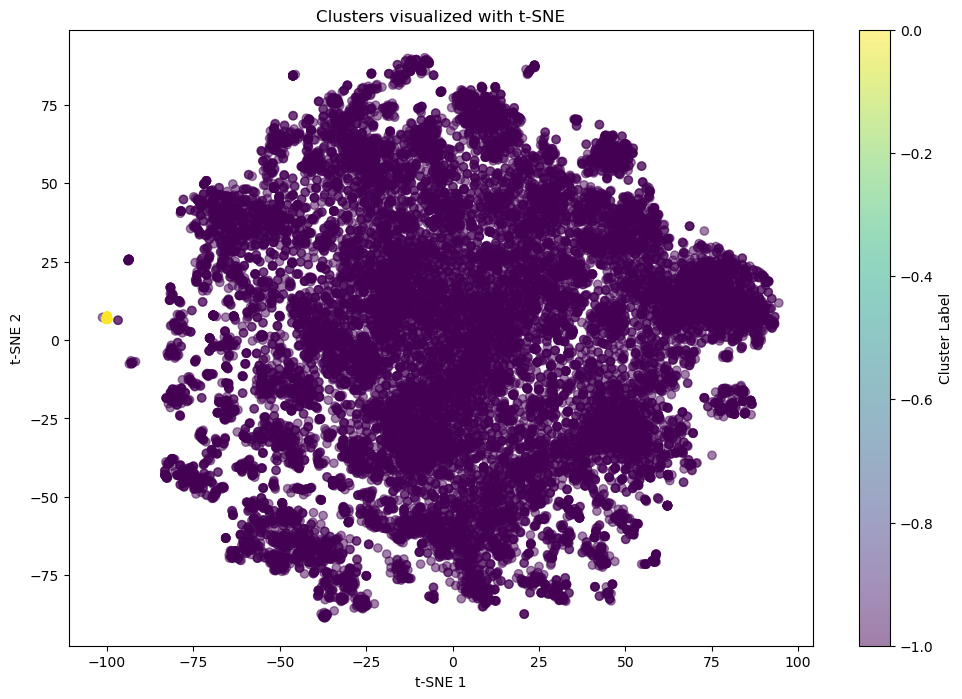

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, random_state=42)

# Apply t-SNE to the PCA-reduced data
tsne_results = tsne.fit_transform(reduced_vectors)

# Visualize the clustering
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.title('Clusters visualized with t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


/Users/nagasriramkochetti/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


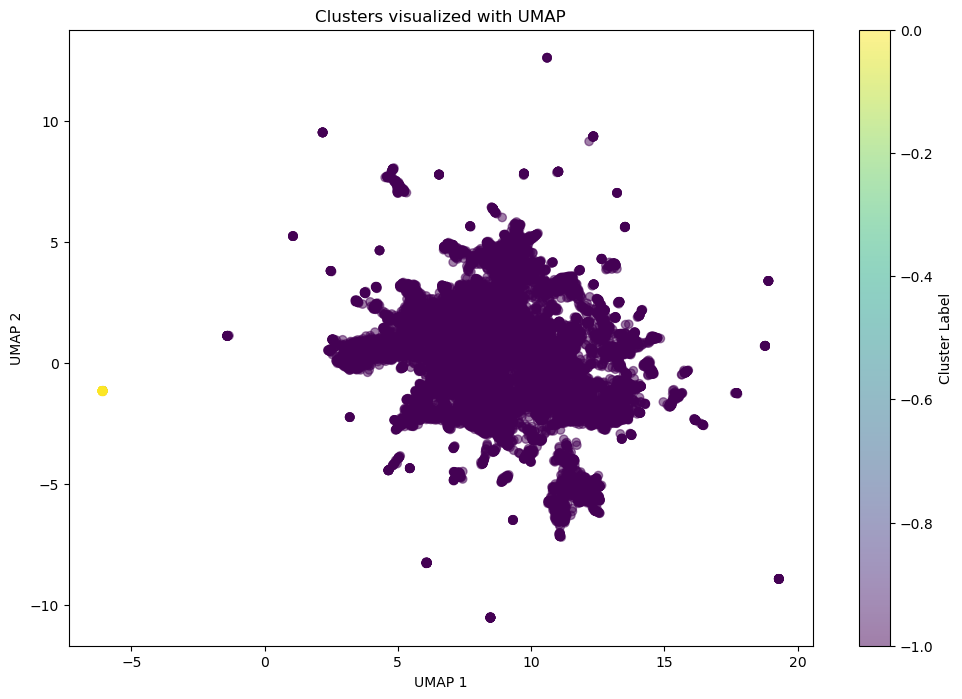

In [37]:
import umap
import matplotlib.pyplot as plt

# Assuming 'reduced_vectors' is the PCA-reduced data and 'dbscan_clusters' contains  DBSCAN cluster labels

# Initialize UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# Apply UMAP to the PCA-reduced data
umap_results = reducer.fit_transform(reduced_vectors)

# Visualize the clustering
plt.figure(figsize=(12, 8))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.title('Clusters visualized with UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


# Large-Scale Data Analysis

## Overview
This document describes a scalable approach to performing clustering and dimensionality reduction on very large datasets. The primary challenge addressed here is the efficient handling of data that may not fit into memory or requires significant computational resources.

## Techniques Employed

### Incremental PCA
- **Objective**: To reduce the dimensionality of large datasets in a memory-efficient manner.
- **How It Works**: Instead of loading the entire dataset into memory, Incremental PCA processes data in mini-batches. This allows it to fit large datasets that exceed memory constraints.

### Mini-Batch K-Means
- **Objective**: To cluster large datasets efficiently.
- **How It Works**: Similar to Incremental PCA, Mini-Batch K-Means processes the data in small batches. This reduces the computation time and memory usage compared to traditional K-Means clustering.

## Implementation Steps

1. **Preprocessing**:
   - Ensure data is in a suitable numeric format for clustering and dimensionality reduction.
   - Normalize the data if necessary to ensure consistent scale across features.

2. **Applying Incremental PCA**:
   - Use Incremental PCA to reduce the dataset's dimensions in a batch-wise manner, making the data more manageable and clustering more effective.

3. **Clustering with Mini-Batch K-Means**:
   - Perform clustering on the dimensionality-reduced data using Mini-Batch K-Means to identify patterns or groups within the data.

4. **Visualization** (Optional):
   - Visualize the clustering results to assess the quality of clusters and gain insights into the data's structure. This step may involve further dimensionality reduction (e.g., using t-SNE or UMAP) for visualization purposes.

5. **Analysis**:
   - Examine the characteristics of each cluster, such as common features or patterns, to understand the underlying structure of the data.

## Benefits

- **Scalability**: The approach is designed to handle datasets that are too large for conventional processing techniques.
- **Efficiency**: By processing data in batches, the computational load is spread out, making it feasible to run on standard hardware.
- **Flexibility**: The methodology can be adapted to various types of data and clustering requirements.

## Conclusion

This scalable approach to clustering and dimensionality reduction enables the analysis of large datasets, which is increasingly important in the era of big data. By leveraging Incremental PCA and Mini-Batch K-Means, we can extract meaningful insights from data that would otherwise be too cumbersome to process.



Evaluating Mini-Batch K-Means with 8 clusters


/Users/nagasriramkochetti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.125

Evaluating Mini-Batch K-Means with 10 clusters


/Users/nagasriramkochetti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.136

Evaluating Mini-Batch K-Means with 12 clusters


/Users/nagasriramkochetti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 12 clusters: 0.147


/Users/nagasriramkochetti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


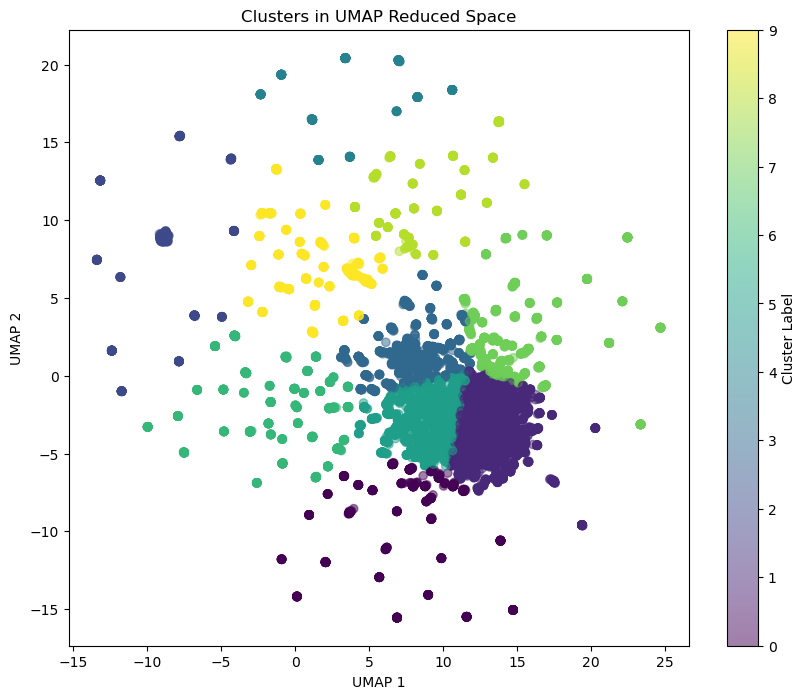

In [43]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import umap  # Make sure UMAP is installed
import matplotlib.pyplot as plt

urls = data['url'].values  # Extracting URLs

# Adjusted TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # Increased max_features
tfidf_vectors = tfidf_vectorizer.fit_transform(urls)

# Tuning the number of components for Incremental PCA
n_components = 75  # Increased from 50
ipca = IncrementalPCA(n_components=n_components)
reduced_data_ipca = ipca.fit_transform(tfidf_vectors.toarray())

# Exploring with different numbers of clusters
for n_clusters in [8, 10, 12]:  # Experimenting with different numbers of clusters
    print(f"\nEvaluating Mini-Batch K-Means with {n_clusters} clusters")
    mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = mbkmeans.fit_predict(reduced_data_ipca)
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(reduced_data_ipca, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}")

# Visualizing with UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
reduced_data_umap = reducer.fit_transform(tfidf_vectors.toarray())  # Directly using TF-IDF vectors for UMAP

# Clustering on UMAP reduced data
mbkmeans_umap = MiniBatchKMeans(n_clusters=10, random_state=42)  # Using the original choice of 10 clusters
umap_cluster_labels = mbkmeans_umap.fit_predict(reduced_data_umap)

# Visualizing the clusters formed by UMAP reduced data
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_umap[:, 0], reduced_data_umap[:, 1], c=umap_cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.title('Clusters in UMAP Reduced Space')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()
